In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Generate dummy data
np.random.seed(42)
n_samples = 10000
fraud_ratio = 0.01  # 1% fraud

# Create features
amount = np.random.exponential(scale=100, size=n_samples)  # Exponential distribution for transaction amounts
time = np.random.uniform(0, 24, size=n_samples)  # Uniform distribution for time of day

# Create labels
labels = np.zeros(n_samples)
fraud_indices = np.random.choice(n_samples, int(n_samples * fraud_ratio), replace=False)
labels[fraud_indices] = 1  # Mark fraud transactions

# Create DataFrame
df = pd.DataFrame({'amount': amount, 'time': time, 'label': labels})

# Check imbalance
print(df['label'].value_counts())

label
0.0    9900
1.0     100
Name: count, dtype: int64


#### BALANCING DATA

/var/folders/18/tkc0bfg551553z9_5wc18z6h0000gn/T/ipykernel_9682/3837236363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


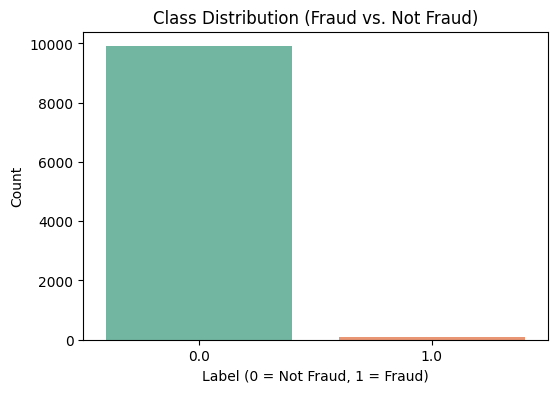

In [11]:
# Bar plot of class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Class Distribution (Fraud vs. Not Fraud)')
plt.xlabel('Label (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

In [12]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]

# Oversample minority class
df_minority_oversampled = resample(df_minority, replace=True, n_samples=9900, random_state=42)

# Combine balanced dataset
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Check new distribution
print(df_balanced['label'].value_counts())

label
0.0    9900
1.0    9900
Name: count, dtype: int64


/var/folders/18/tkc0bfg551553z9_5wc18z6h0000gn/T/ipykernel_9682/910241914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_balanced, palette='Set2')


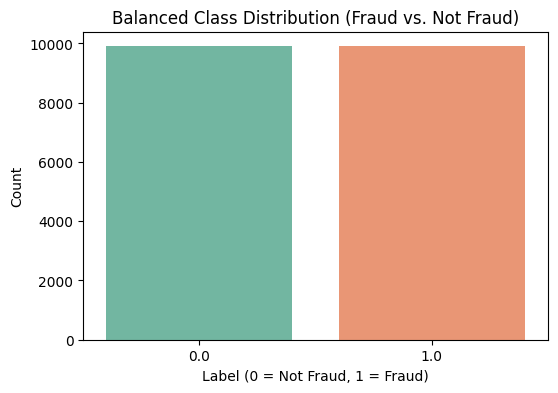

In [13]:
# Bar plot of balanced class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_balanced, palette='Set2')
plt.title('Balanced Class Distribution (Fraud vs. Not Fraud)')
plt.xlabel('Label (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

In [14]:
# Generate dummy data
np.random.seed(42)
n_samples = 1000

# Create features
days = np.arange(n_samples)
prices = np.cumsum(np.random.normal(0, 1, n_samples))  # Simulated stock prices

# Create target (next day's price)
target = np.roll(prices, -1)  # Shift prices by 1 day
target[-1] = prices[-1]  # Handle the last value

# Create DataFrame
df = pd.DataFrame({'day': days, 'price': prices, 'target': target})

# Drop the last row (target is NaN)
df = df.iloc[:-1]

# Split into train and test sets
X = df[['day', 'price']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)  # No shuffling for time-series data

In [15]:
# see length of train and test data
print(len(X_train), len(X_test))

799 200
